In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [44]:
# Reading the dataset

project_path = '/content/drive/My Drive/Colab/'
file_name ='TempOutput_1.xlsx'

In [45]:
unsampled_df=pd.read_excel(project_path+file_name)

In [46]:
unsampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7909 entries, 0 to 7908
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         7909 non-null   int64 
 1   Short description  7909 non-null   object
 2   Description        7906 non-null   object
 3   Assignment group   7909 non-null   object
 4   New Description    7876 non-null   object
 5   Language           7909 non-null   object
 6   Lemmatized clean   7909 non-null   object
dtypes: int64(1), object(6)
memory usage: 432.6+ KB


In [47]:
unsampled_df.drop(["Unnamed: 0","Short description", "Description", "Language"],axis=1,inplace=True)

In [48]:
unsampled_df.head(5)

,Assignment group,New Description,Lemmatized clean
0,GRP_0,login issue verified user details employee man...,"['login', 'issue', 'verify', 'user', 'detail',..."
1,GRP_0,outlook received from hmjdrvpb komuaywn team m...,"['outlook', 'receive', 'hmjdrvpb', 'komuaywn',..."
2,GRP_0,cannot log in to vpn received from eylqgodm yb...,"['log', 'vpn', 'receive', 'eylqgodm', 'ybqkwia..."
3,GRP_0,unable to access hr tool page unable to access...,"['unable', 'access', 'hr', 'tool', 'page', 'un..."
4,GRP_0,skype error skype error,"['skype', 'error', 'skype', 'error']"


In [49]:
unsampled_df.isnull().sum()

Assignment group     0
New Description     33
Lemmatized clean     0
dtype: int64

In [9]:
unsampled_df.isnull().sum()
unsampled_df[unsampled_df.isnull().any(axis=1)]

,Assignment group,New Description,Lemmatized clean
1038,GRP_48,NaN,[]
1127,GRP_30,NaN,[]
1386,GRP_30,NaN,[]
1621,GRP_48,NaN,[]
1622,GRP_48,NaN,[]
1625,GRP_48,NaN,[]
1631,GRP_48,NaN,[]
1860,GRP_30,NaN,[]
1861,GRP_30,NaN,[]
1906,GRP_31,NaN,[]


In [10]:
unsampled_df = unsampled_df.dropna(axis=0)

In [11]:
others_df = unsampled_df[unsampled_df['Assignment group'] != 'GRP_0']

In [12]:
maxOthers = others_df['Assignment group'].value_counts().max()
maxOthers

645

In [13]:
# Upsample the minority classes and downsample the majority classes
from sklearn.utils import resample

df_to_process = unsampled_df[0:0]
for grp in unsampled_df['Assignment group'].unique():
    assign_grp_df = unsampled_df[unsampled_df['Assignment group'] == grp]
    resampled = resample(assign_grp_df, replace=True, n_samples=maxOthers, random_state=123)
    df_to_process = df_to_process.append(resampled)

In [14]:
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
  
df_to_process['Assignment group ID']= label_encoder.fit_transform(df_to_process['Assignment group']) 
df_to_process['Assignment group ID'].unique()

array([ 0,  1, 23, 34, 45, 56, 67, 72, 73,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28,
       29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48,
       49, 50, 51, 43, 52, 53, 54, 55, 57, 58, 26, 59, 60, 61, 62, 63, 64,
       65, 66, 68, 69, 70, 71])

In [15]:
# Import the necessary libraries for modelling and plotting acuracy
from gensim.models import Word2Vec
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dropout, Dense, Activation

from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from keras.preprocessing.text import Tokenizer
# import the train test split package from scikit learn
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [16]:
df_to_process.head(5)

,Assignment group,New Description,Lemmatized clean,Assignment group ID
2960,GRP_0,erp login trouble received from xosycftu olhpm...,"['erp', 'login', 'trouble', 'receive', 'xosycf...",0
2447,GRP_0,frequent account lock out frequent account loc...,"['frequent', 'account', 'lock', 'frequent', 'a...",0
3996,GRP_0,login issue login issue verified user details ...,"['login', 'issue', 'login', 'issue', 'verify',...",0
7034,GRP_0,engineering tool is not working engineering to...,"['engineering', 'tool', 'work', 'engineering',...",0
4911,GRP_0,not able to access sid received from miecoszw ...,"['able', 'access', 'sid', 'receive', 'miecoszw...",0


In [17]:
def wordTokenizer(dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe

In [18]:
# Word2Vec the dataframe and store the embedding result
sentences = [line.split(' ') for line in df_to_process['New Description']] 
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format(project_path+'word2vec.txt')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [19]:
# Load the embedding into memory
embedding_indices = dict()
f = open(project_path+'word2vec.txt')

for line in f:
  values = line.split()
  word = values[0]
  coeff = np.array(values[1:], dtype='float32')
  embedding_indices[word] = coeff
f.close()

len(embedding_indices)

12343

In [20]:
results = pd.DataFrame()
predictedResults = pd.DataFrame()

In [21]:
df_to_process.head(5)

,Assignment group,New Description,Lemmatized clean,Assignment group ID
2960,GRP_0,erp login trouble received from xosycftu olhpm...,"['erp', 'login', 'trouble', 'receive', 'xosycf...",0
2447,GRP_0,frequent account lock out frequent account loc...,"['frequent', 'account', 'lock', 'frequent', 'a...",0
3996,GRP_0,login issue login issue verified user details ...,"['login', 'issue', 'login', 'issue', 'verify',...",0
7034,GRP_0,engineering tool is not working engineering to...,"['engineering', 'tool', 'work', 'engineering',...",0
4911,GRP_0,not able to access sid received from miecoszw ...,"['able', 'access', 'sid', 'receive', 'miecoszw...",0


In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 300
tokenizer = Tokenizer(split=' ')
tokenizer.fit_on_texts(df_to_process["New Description"].values)
X_seq = tokenizer.texts_to_sequences(df_to_process["New Description"].values)
X_padded = pad_sequences(X_seq, maxlen=max_len)

In [23]:
numWords = len(tokenizer.word_index) + 1
epochs = 20
batch_size=100
numWords

12343

In [24]:
# Try the BiLSTM model on the raw or unsampled data and predict the accuracy.

# Tokenize
tokenizer, X = wordTokenizer(df_to_process['New Description'])
y = np.asarray(df_to_process['Assignment group ID'])
X = pad_sequences(X,maxlen=max_len)

In [25]:
# Create embedding matrix

embedding_matrix = np.zeros((numWords+1,100))

for i,word in tokenizer.index_word.items():
  if i<numWords+1:
    embedding_vector = embedding_indices.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

embedding_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.15348303e+00, -1.09320033e+00, -3.00817060e+00, ...,
         1.23354208e+00, -1.54826438e+00, -1.24885929e+00],
       [ 3.31065506e-01, -1.81466675e+00, -8.92821550e-01, ...,
         7.09591568e-01, -1.43603134e+00, -1.08622420e+00],
       ...,
       [-7.80330366e-03, -9.29059577e-04,  2.08052583e-02, ...,
         1.79445501e-02, -2.19938830e-02,  2.06781086e-02],
       [-3.98038886e-03, -4.15516784e-03,  1.76522266e-02, ...,
         1.95057504e-02, -2.43130829e-02,  1.50261121e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [33]:
LSTM_w2v_unsampled_weights_df = pd.DataFrame(embedding_matrix)
LSTM_w2v_unsampled_weights_df.to_excel(project_path+'LSTM_w2v_unsampled_weights.xlsx', index = True)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [35]:
X_train,X_test,y_train,y_test

(array([[   0,    0,    0, ...,   44,    6, 1337],
        [   0,    0,    0, ...,  560,   27,  591],
        [   0,    0,    0, ...,   14,   43,   20],
        ...,
        [   0,    0,    0, ...,   14,   43,   20],
        [   0,    0,    0, ...,    0,    0,    1],
        [   0,    0,    0, ...,    3,    2,  140]], dtype=int32),
 array([[   0,    0,    0, ...,  720,  204,    9],
        [   0,    0,    0, ...,  259,  125,  126],
        [   0,    0,    0, ...,  166,  233,    1],
        ...,
        [   0,    0,    0, ..., 3195, 2294, 1024],
        [   0,    0,    0, ...,  318,    1,   68],
        [   0,    0,    0, ...,   38,  122,  248]], dtype=int32),
 array([60, 61, 45, ..., 53, 24, 66]),
 array([50, 64,  1, ..., 17, 68, 58]))

In [36]:
(pd.Series(y_train)).unique()

array([60, 61, 45, 34,  8, 55, 65, 36, 54, 70, 56,  2, 31, 14, 41, 66, 24,
       64, 67, 16, 53,  0, 37, 63, 59,  4, 50, 29, 58, 15, 51, 39, 22, 71,
       12, 28, 20, 35, 33, 18, 25, 57, 73, 52,  1, 47, 42,  9, 44, 30, 69,
       13, 43, 23, 26, 72,  7, 27, 10,  5, 17, 68, 48, 32, 46, 11,  3, 40,
       62, 49, 19, 21,  6, 38])

In [37]:
input_layer = Input(shape=(max_len,),dtype=tf.int64)
embed = Embedding(numWords+1,output_dim=100,input_length=max_len,weights=[embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense((len((pd.Series(y_train)).unique())+1),activation='softmax')(dense)   

model = Model(input_layer,out)
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()
plot_model(model,to_file="LSTM_Model.jpg")

checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 100)          1234400   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               234496    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_3 (Dense)              (None, 75)                7575      
Total params: 1,502,171
Trainable params: 1,502,171
Non-trainable params: 0
____________________________________________

In [38]:
model_history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_test,y_test))

Epoch 1/20
335/335 [==============================] - ETA: 0s - loss: 1.8583 - accuracy: 0.5522
Epoch 00001: val_accuracy improved from -inf to 0.79552, saving model to model-001-0.795516.h5
335/335 [==============================] - 54s 160ms/step - loss: 1.8583 - accuracy: 0.5522 - val_loss: 0.7426 - val_accuracy: 0.7955
Epoch 2/20
335/335 [==============================] - ETA: 0s - loss: 0.6169 - accuracy: 0.8274
Epoch 00002: val_accuracy improved from 0.79552 to 0.88344, saving model to model-002-0.883442.h5
335/335 [==============================] - 53s 157ms/step - loss: 0.6169 - accuracy: 0.8274 - val_loss: 0.4030 - val_accuracy: 0.8834
Epoch 3/20
335/335 [==============================] - ETA: 0s - loss: 0.3873 - accuracy: 0.8857
Epoch 00003: val_accuracy improved from 0.88344 to 0.91564, saving model to model-003-0.915637.h5
335/335 [==============================] - 53s 157ms/step - loss: 0.3873 - accuracy: 0.8857 - val_loss: 0.2944 - val_accuracy: 0.9156
Epoch 4/20
335/335 

In [ ]:
model_history.history

{'accuracy': [0.5626590251922607,
  0.8232318758964539,
  0.8896471261978149,
  0.9196671843528748,
  0.9308611154556274,
  0.9337044954299927,
  0.9429828524589539,
  0.9475921392440796,
  0.9497470855712891,
  0.956212043762207,
  0.958157479763031,
  0.9580976366996765,
  0.9591152667999268,
  0.9588159322738647,
  0.9597437977790833,
  0.958995521068573,
  0.9601628184318542,
  0.9612103700637817,
  0.9603723287582397,
  0.9587560892105103],
 'loss': [1.838984489440918,
  0.6232320070266724,
  0.37952929735183716,
  0.27495241165161133,
  0.22788368165493011,
  0.21699371933937073,
  0.18229874968528748,
  0.1670667976140976,
  0.15365836024284363,
  0.13392972946166992,
  0.12528900802135468,
  0.12182215601205826,
  0.12070159614086151,
  0.11963889002799988,
  0.11750727891921997,
  0.11600662767887115,
  0.11564932763576508,
  0.11442184448242188,
  0.1148597002029419,
  0.11593712121248245],
 'lr': [0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,

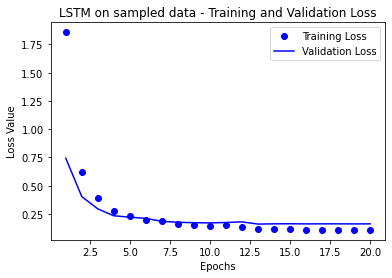

In [39]:
# Plotting losses
loss_values = model_history.history['loss']
val_loss_values = model_history.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('LSTM on sampled data - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

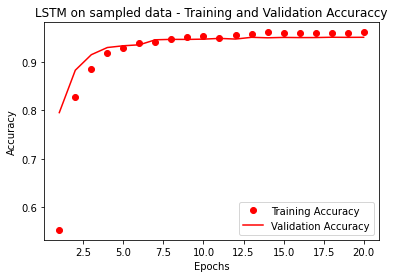

In [40]:
# Training and Validation Accuracy

acc_values = model_history.history['accuracy']
val_acc_values = model_history.history['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('LSTM on sampled data - Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [41]:
model_df = pd.DataFrame(model_history.history)
model_df

,loss,accuracy,val_loss,val_accuracy,lr
0,1.858282,0.552243,0.742629,0.795516,0.0010
1,0.616927,0.827422,0.402989,0.883442,0.0010
2,0.387309,0.885696,0.294447,0.915637,0.0010
3,0.271936,0.918201,0.233475,0.930512,0.0010
4,0.233711,0.930173,0.221141,0.934143,0.0010
5,0.195550,0.940618,0.210276,0.936169,0.0010
6,0.184719,0.942205,0.184310,0.946575,0.0010
7,0.165081,0.948729,0.175929,0.947413,0.0010
8,0.148249,0.951872,0.172237,0.947343,0.0010
9,0.138716,0.954536,0.170350,0.947901,0.0010
